In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import os
from pathlib import Path
import scrublet as scr
from pathlib import Path
import scvelo as scv
from scipy.stats import ranksums

import scirpy as ir
from cycler import cycler
import muon as mu

# Plotting 
import matplotlib
import matplotlib.pyplot as plt

sns.set_style('ticks')
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['image.cmap'] = 'Spectral_r'

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore", module="matplotlib", message="findfont")

# Inline plotting
%matplotlib inline

# Reset random seed
np.random.seed(5)

In [4]:
# Load 10X output
adata_low_salt = sc.read_10x_mtx(
    './raw_data/0170/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading


# Read TCR data
adata_low_salt_tcr = ir.io.read_10x_vdj(
    "./raw_data/0170/filtered_contig_annotations.csv"
)

# Integrate into single object
ir.pp.merge_with_ir(adata_low_salt, adata_low_salt_tcr)

# Look at object
adata_low_salt

AnnData object with n_obs × n_vars = 5976 × 36601
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir'
    var: 'gene_ids'

In [5]:
adata_low_salt

adata_low_salt.obs['Condition'] = 'Low NaCl'
adata_low_salt.obs

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,IR_VJ_1_productive,IR_VJ_2_productive,IR_VDJ_1_productive,IR_VDJ_2_productive,IR_VJ_1_v_call,IR_VJ_2_v_call,IR_VDJ_1_v_call,IR_VDJ_2_v_call,has_ir,Condition
AAACCTGAGACGACGT-1,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,Low NaCl
AAACCTGAGCCAGAAC-1,True,True,False,[],TRAC,NaN,TRBC1,NaN,1856.0,NaN,...,True,None,True,None,TRAV27,NaN,TRBV30,NaN,True,Low NaCl
AAACCTGCAACTTGAC-1,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,Low NaCl
AAACCTGCAAGGTGTG-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,7814.0,NaN,...,True,None,True,None,TRAV26-2,NaN,TRBV6-1,NaN,True,Low NaCl
AAACCTGCACTGTTAG-1,True,True,False,[],NaN,NaN,TRBC1,NaN,NaN,NaN,...,None,None,True,None,NaN,NaN,TRBV29-1,NaN,True,Low NaCl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGCTTAGA-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,10260.0,NaN,...,True,None,True,None,TRAV39,NaN,TRBV20-1,NaN,True,Low NaCl
TTTGTCATCGGAAATA-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,3426.0,NaN,...,True,None,True,None,TRAV12-1,NaN,TRBV4-3,NaN,True,Low NaCl
TTTGTCATCTCCGGTT-1,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,Low NaCl
TTTGTCATCTGAAAGA-1,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,Low NaCl


In [6]:
# Load 10X output
adata_high_salt = sc.read_10x_mtx(
    './raw_data/0171/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)  

# Read TCR data
adata_high_salt_tcr = ir.io.read_10x_vdj(
    "./raw_data/0171/filtered_contig_annotations.csv"
)

# Integrate into single object
ir.pp.merge_with_ir(adata_high_salt, adata_high_salt_tcr)

# Look at object
adata_high_salt

AnnData object with n_obs × n_vars = 4367 × 36601
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir'
    var: 'gene_ids'

In [7]:
adata_high_salt

adata_high_salt.obs['Condition'] = 'High NaCl'
adata_high_salt.obs

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,IR_VJ_1_productive,IR_VJ_2_productive,IR_VDJ_1_productive,IR_VDJ_2_productive,IR_VJ_1_v_call,IR_VJ_2_v_call,IR_VDJ_1_v_call,IR_VDJ_2_v_call,has_ir,Condition
AAACCTGAGATCCGAG-1,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,High NaCl
AAACCTGAGCAAATCA-1,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,High NaCl
AAACCTGAGGAGTTGC-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,1774.0,NaN,...,True,None,True,None,TRAV1-2,NaN,TRBV6-4,NaN,True,High NaCl
AAACCTGCACGAGGTA-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,240.0,NaN,...,True,None,True,None,TRAV1-2,NaN,TRBV7-2,NaN,True,High NaCl
AAACCTGGTCGCGTGT-1,True,True,False,[],TRAC,TRAC,TRBC2,NaN,1604.0,1122.0,...,True,True,True,None,TRAV13-1,TRAV12-2,TRBV4-1,NaN,True,High NaCl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGCGCTTG-1,True,True,False,[],NaN,NaN,TRBC1,NaN,NaN,NaN,...,None,None,True,None,NaN,NaN,TRBV2,NaN,True,High NaCl
TTTGTCAGTTTGCATG-1,True,True,False,[],TRAC,NaN,TRBC1,NaN,902.0,NaN,...,True,None,True,None,TRAV38-2/DV8,NaN,TRBV9,NaN,True,High NaCl
TTTGTCATCAGCATGT-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,3438.0,NaN,...,True,None,True,None,TRAV3,NaN,TRBV7-8,NaN,True,High NaCl
TTTGTCATCGCGCCAA-1,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,High NaCl


In [87]:
#Concat high and low salt adata objects
adata_list = [adata_low_salt, adata_high_salt]
adata = sc.concat(adata_list, axis=0)
adata.obs

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,IR_VJ_1_productive,IR_VJ_2_productive,IR_VDJ_1_productive,IR_VDJ_2_productive,IR_VJ_1_v_call,IR_VJ_2_v_call,IR_VDJ_1_v_call,IR_VDJ_2_v_call,has_ir,Condition
AAACCTGAGACGACGT-1,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,Low NaCl
AAACCTGAGCCAGAAC-1,True,True,False,[],TRAC,NaN,TRBC1,NaN,1856.0,NaN,...,True,None,True,None,TRAV27,NaN,TRBV30,NaN,True,Low NaCl
AAACCTGCAACTTGAC-1,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,Low NaCl
AAACCTGCAAGGTGTG-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,7814.0,NaN,...,True,None,True,None,TRAV26-2,NaN,TRBV6-1,NaN,True,Low NaCl
AAACCTGCACTGTTAG-1,True,True,False,[],NaN,NaN,TRBC1,NaN,NaN,NaN,...,None,None,True,None,NaN,NaN,TRBV29-1,NaN,True,Low NaCl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGCGCTTG-1,True,True,False,[],NaN,NaN,TRBC1,NaN,NaN,NaN,...,None,None,True,None,NaN,NaN,TRBV2,NaN,True,High NaCl
TTTGTCAGTTTGCATG-1,True,True,False,[],TRAC,NaN,TRBC1,NaN,902.0,NaN,...,True,None,True,None,TRAV38-2/DV8,NaN,TRBV9,NaN,True,High NaCl
TTTGTCATCAGCATGT-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,3438.0,NaN,...,True,None,True,None,TRAV3,NaN,TRBV7-8,NaN,True,High NaCl
TTTGTCATCGCGCCAA-1,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,NaN,NaN,NaN,NaN,None,High NaCl


In [88]:
#doublet removal
scrub = scr.Scrublet(adata.X)
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()

adata.obs['doublet_info'] = adata.obs['predicted_doublets']
adata = adata[adata.obs['doublet_info'] == False, :]

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 45.2 seconds


In [10]:
adata_new = adata.copy()

In [89]:
#preprocessing
sc.pp.filter_cells(adata, min_counts=1)
sc.pp.filter_genes(adata, min_counts=1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)

sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=10)

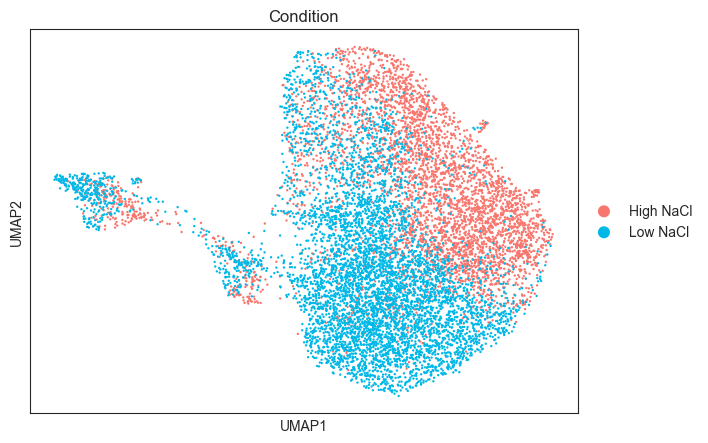

In [90]:
#UMAP
sc.tl.umap(adata)

sc.pl.scatter(
    adata,
    basis="umap",
    color="Condition",
    palette=["#F8766D", "#00B8E7"],
)

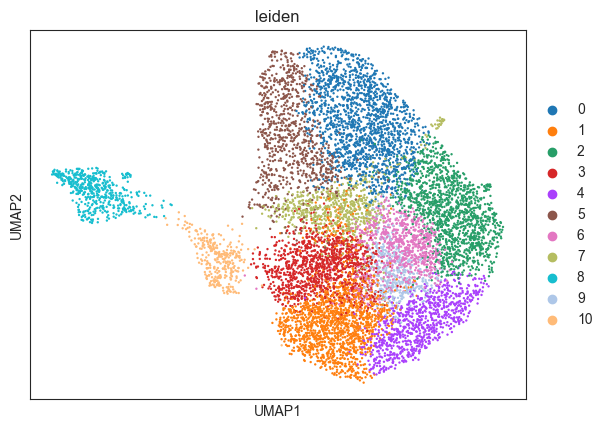

In [11]:
sc.tl.leiden(adata, resolution = 0.7)
sc.pl.umap(adata, color=['leiden'])

<b> TCR analysis <b>

<Axes: title={'center': 'Number of cells in receptor_subtype by Condition'}, xlabel='receptor_subtype', ylabel='Number of cells'>

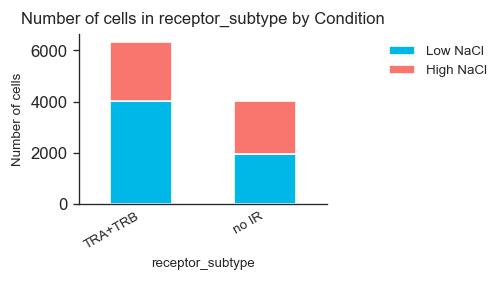

In [91]:
ir.tl.chain_qc(adata)
ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="Condition")

In [19]:
# Count the number of cells removed
removed_count = len(adata.obs[adata.obs['receptor_subtype'] == 'no IR'])

print(f"Number of cells removed: {removed_count}")

# Filter out cells labeled as "no IR"
adata = adata[adata.obs['receptor_subtype'] != 'no IR'].copy()


Number of cells removed: 0


<Axes: title={'center': 'Number of cells in receptor_subtype by Condition'}, xlabel='receptor_subtype', ylabel='Number of cells'>

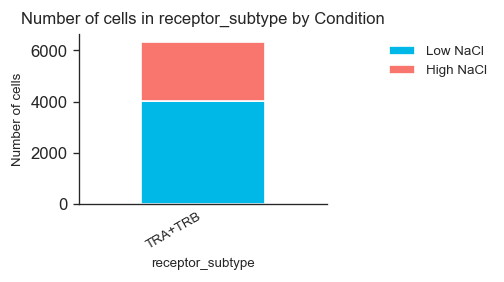

In [21]:
ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="Condition")

<Axes: title={'center': 'Number of cells in chain_pairing by Condition'}, xlabel='chain_pairing', ylabel='Number of cells'>

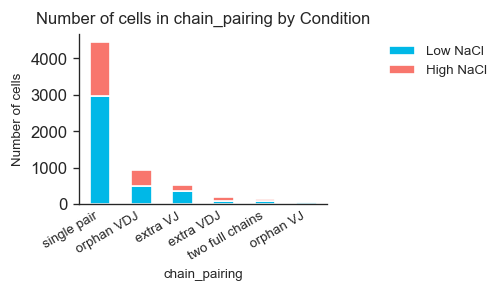

In [22]:
ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="Condition")

In [23]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(
            adata.obs["chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains"]
            )
        )
        / adata.n_obs
    )
)

Fraction of cells with more than one pair of TCRs: 0.14


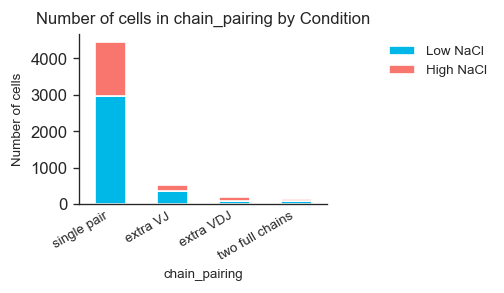

In [24]:
adata = adata[~adata.obs["chain_pairing"].isin(["orphan VDJ", "orphan VJ"]), :].copy()
ax = ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="Condition")

In [95]:
# Make the observation names unique
adata.obs_names_make_unique()

# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(adata)
ir.tl.define_clonotypes(adata, receptor_arms="all", dual_ir="primary_only")

  0%|          | 0/3051 [00:00<?, ?it/s]

In [31]:
ir.tl.clonotype_network(adata, min_cells=2)

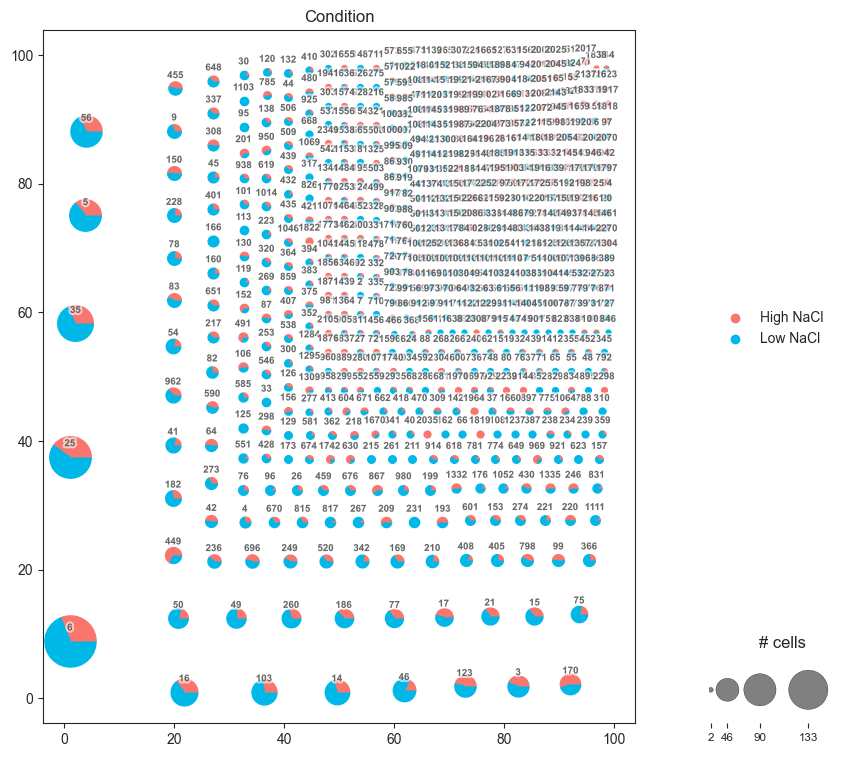

In [32]:
ir.pl.clonotype_network(
    adata, color="Condition", base_size=6, label_fontsize=7, panel_size=(8, 9)
)

plt.savefig("nt_clonotype_network_plot.pdf", format="pdf")

# Show the plot
plt.show()

In [56]:
num_clones = adata.obs['clone_id'].nunique()
print("Number of clones:", num_clones)

Number of clones: 2461


In [33]:
num_clones = adata.obs['clone_id'].nunique()
total_cells = len(adata.obs)

num_non_clones = total_cells - num_clones
print("Number of cells that are not part of a clone:", num_non_clones)
print(total_cells)

Number of cells that are not part of a clone: 2864
5325


In [58]:
adata_high_salt = adata[adata.obs['Condition'] == 'High NaCl']
adata_low_salt = adata[adata.obs['Condition'] == 'Low NaCl']

num_clones_high_salt = adata_high_salt.obs['clone_id'].nunique()
num_clones_low_salt = adata_low_salt.obs['clone_id'].nunique()

shared_clonotypes = set(adata_high_salt.obs['clone_id']).intersection(adata_low_salt.obs['clone_id'])
num_shared_clones = len(shared_clonotypes)

unique_clonotypes_high_salt = set(adata_high_salt.obs['clone_id']) - shared_clonotypes
unique_clonotypes_low_salt = set(adata_low_salt.obs['clone_id']) - shared_clonotypes

num_unique_clones_high_salt = len(unique_clonotypes_high_salt)
num_unique_clones_low_salt = len(unique_clonotypes_low_salt)

print("Number of shared clones:", num_shared_clones)
print("Number of high salt only clones:", num_unique_clones_high_salt)
print("Number of low salt only clones:", num_unique_clones_low_salt)

Number of shared clones: 331
Number of high salt only clones: 693
Number of low salt only clones: 1438


In [34]:
adata.obs

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,Condition,doublet_scores,predicted_doublets,doublet_info,n_counts,receptor_type,receptor_subtype,chain_pairing,clone_id,clone_id_size
AAACCTGAGCCAGAAC-1,True,True,False,[],TRAC,NaN,TRBC1,NaN,1856.0,NaN,...,Low NaCl,0.310811,False,False,6318.0,TCR,TRA+TRB,single pair,0,1
AAACCTGCAAGGTGTG-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,7814.0,NaN,...,Low NaCl,0.032151,False,False,11623.0,TCR,TRA+TRB,single pair,1,2
AAACCTGGTGAAAGAG-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,6186.0,NaN,...,Low NaCl,0.091743,False,False,18950.0,TCR,TRA+TRB,single pair,2,3
AAACCTGGTGACTACT-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,3986.0,NaN,...,Low NaCl,0.089431,False,False,15829.0,TCR,TRA+TRB,single pair,3,38
AAACCTGTCTGACCTC-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,3940.0,NaN,...,Low NaCl,0.165075,False,False,26574.0,TCR,TRA+TRB,single pair,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCGGCGCTA-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,2126.0,NaN,...,High NaCl,0.224138,False,False,21444.0,TCR,TRA+TRB,single pair,6,227
TTTGTCAGTCTCCATC-1,True,True,False,[],TRAC,NaN,TRBC1,TRBC2,3656.0,NaN,...,High NaCl,0.160000,False,False,16504.0,TCR,TRA+TRB,extra VDJ,157,5
TTTGTCAGTCTCTTAT-1,True,True,False,[],TRAC,TRAC,TRBC2,NaN,2574.0,1456.0,...,High NaCl,0.297180,False,False,22832.0,TCR,TRA+TRB,extra VJ,182,21
TTTGTCAGTTTGCATG-1,True,True,False,[],TRAC,NaN,TRBC1,NaN,902.0,NaN,...,High NaCl,0.045977,False,False,8379.0,TCR,TRA+TRB,single pair,771,3


In [35]:
ir.tl.clonal_expansion(adata)

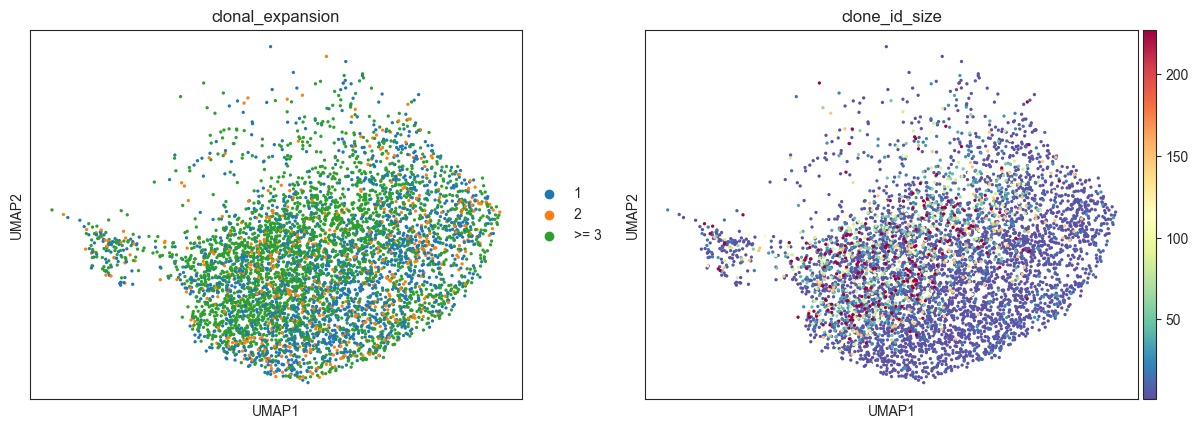

In [36]:
sc.pl.umap(adata, color=["clonal_expansion", "clone_id_size"], save = "clonal_expansion.pdf")

<Axes: >

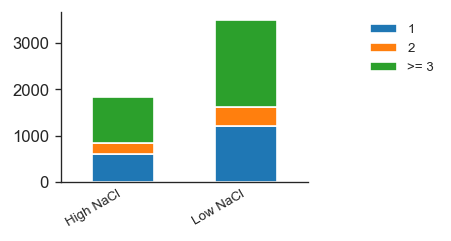

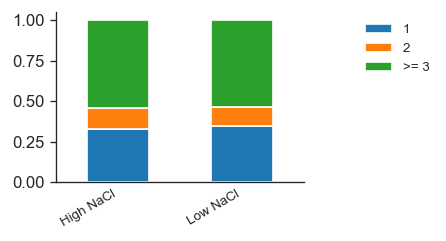

In [37]:
ir.pl.clonal_expansion(adata, groupby="Condition", clip_at=3, normalize=False)
ir.pl.clonal_expansion(adata, groupby="Condition", clip_at=3, normalize=True)

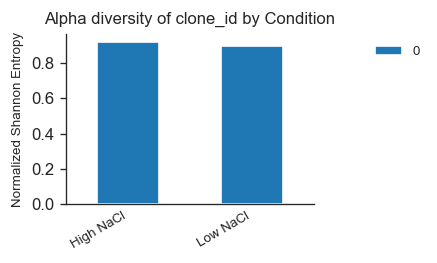

In [38]:
ax = ir.pl.alpha_diversity(adata, metric="normalized_shannon_entropy", groupby="Condition")

<Axes: title={'center': 'Number of cells in clone_id by Condition'}, xlabel='clone_id', ylabel='Number of cells'>

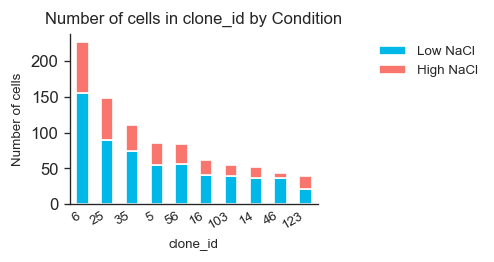

In [64]:
ir.pl.group_abundance(adata, groupby="clone_id", target_col="Condition", max_cols=10)

In [60]:
df, dst, lk = ir.tl.repertoire_overlap(adata, "Condition", inplace=False)
df.head()

clone_id,0,1,2,3,4,5,6,7,8,9,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460
Condition,,,,,,,,,,,,,,,,,,,,,
High NaCl,0.0,0.0,0.0,17.0,3.0,31.0,71.0,1.0,0.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Low NaCl,1.0,2.0,3.0,21.0,7.0,55.0,156.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'Repertoire overlap between High NaCl and Low NaCl'}, xlabel='Clonotype size in High NaCl', ylabel='Clonotype size in Low NaCl'>

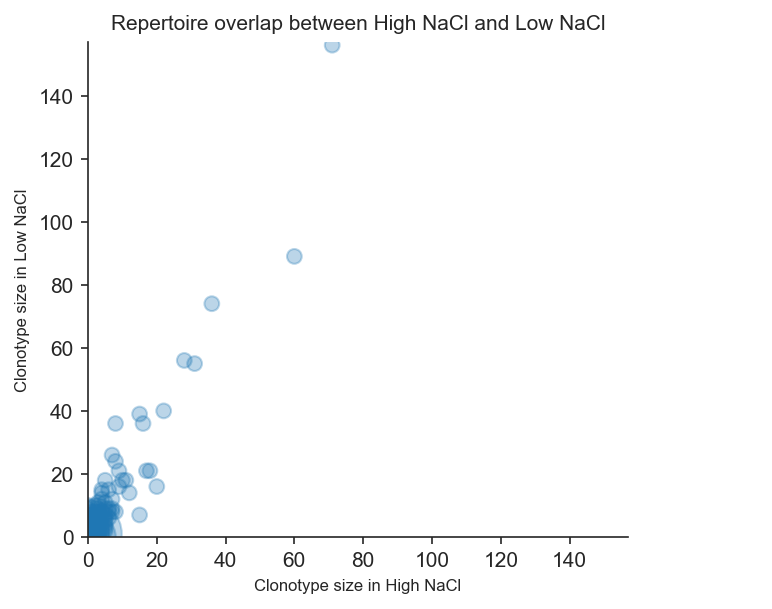

In [42]:
ir.tl.repertoire_overlap(adata, "Condition")
ir.pl.repertoire_overlap(
    adata, "Condition", pair_to_plot=["High NaCl", "Low NaCl"], fig_kws={"figsize": (6, 6), "dpi": 150}
)

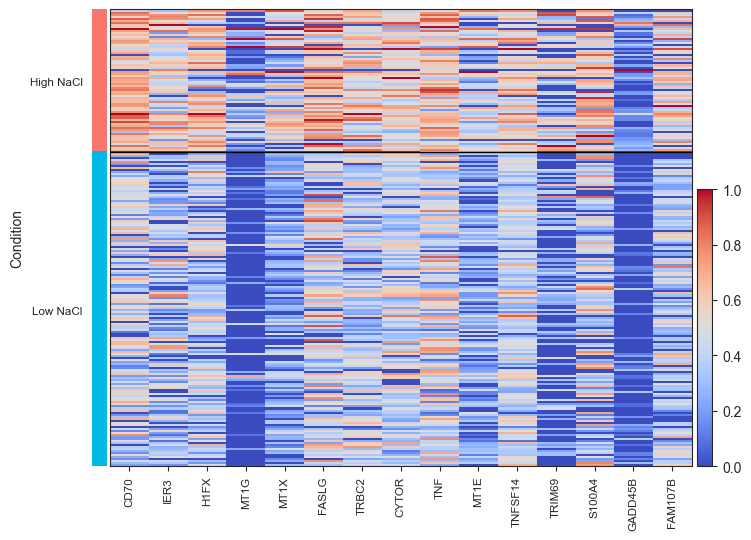

In [49]:
import scanpy as sc
import seaborn as sns

# Filter the data for clone ID 6 and high salt and low salt conditions
subset_adata = adata[
    (adata.obs['clone_id'] == "6") &
    (adata.obs['Condition'].isin(["High NaCl", "Low NaCl"]))
]

# Perform the rank genes groups analysis
sc.tl.rank_genes_groups(
    subset_adata,
    groupby="Condition",
    groups=["High NaCl", "Low NaCl"],
    reference="Low NaCl",
    method="wilcoxon"
)

# Extract the differentially expressed genes for the "High NaCl" condition
high_salt_DEGs = sc.get.rank_genes_groups_df(subset_adata, group="High NaCl")

N = 15  # Number of genes to display

# Filter the top DEGs
top_DEGs = high_salt_DEGs.iloc[:N, :]

# Create a heatmap to visualize the expression of the top DEGs
sc.pl.heatmap(
    subset_adata,
    var_names=top_DEGs["names"],
    groupby="Condition",
    cmap="coolwarm",
    dendrogram=False,
    figsize=(8, 6),
    standard_scale="var"
)

In [54]:
# Perform dpt on clone with ID 6

subset_adata = adata[adata.obs['clone_id'] == "6"].copy()
sc.pp.neighbors(subset_adata, n_neighbors=10, n_pcs=20)

start_cell = subset_adata.obs_names[0]
root_cell_index = 0
sc.tl.diffmap(subset_adata)
sc.tl.dpt(subset_adata, n_branchings=0, root=root_cell_index)
sc.pl.dpt_timeseries(subset_adata)

TypeError: dpt() got an unexpected keyword argument 'root'

In [92]:
vdjdb = ir.datasets.vdjdb()
ir.pp.ir_dist(adata, vdjdb, metric="identity", sequence="aa")

In [93]:
adata_copy = adata.copy()

In [96]:
ir.tl.ir_query(
    adata,
    vdjdb,
    metric="identity",
    sequence="aa",
    receptor_arms="any",
    dual_ir="any",
)

  0%|          | 0/3184 [00:00<?, ?it/s]

In [97]:
ir.tl.ir_query_annotate_df(
    adata,
    vdjdb,
    metric="identity",
    sequence="aa",
    include_ref_cols=["antigen.species", "antigen.gene"],
)

,antigen.species,antigen.gene
AAACCTGAGGAGTTGC-1,CMV,IE1
AAACCTGAGGAGTTGC-1,InfluenzaA,M
AAACCTGAGGAGTTGC-1,CMV,IE1
AAACCTGAGGAGTTGC-1,CMV,IE1
AAACCTGAGGAGTTGC-1,HomoSapiens,TYR
...,...,...
TTTGTCAGTCTCTTAT-1,CMV,pp65
TTTGTCAGTCTCTTAT-1,SARS-CoV-2,ORF3
TTTGTCATCGCTTAGA-1,HomoSapiens,MLANA
TTTGTCATCGCTTAGA-1,HomoSapiens,BST2


In [99]:
ir.tl.ir_query_annotate(
    adata,
    vdjdb,
    metric="identity",
    sequence="aa",
    include_ref_cols=["antigen.species"],
    suffix="_ir",
    inplace=True
)


  0%|          | 0/1494 [00:00<?, ?it/s]

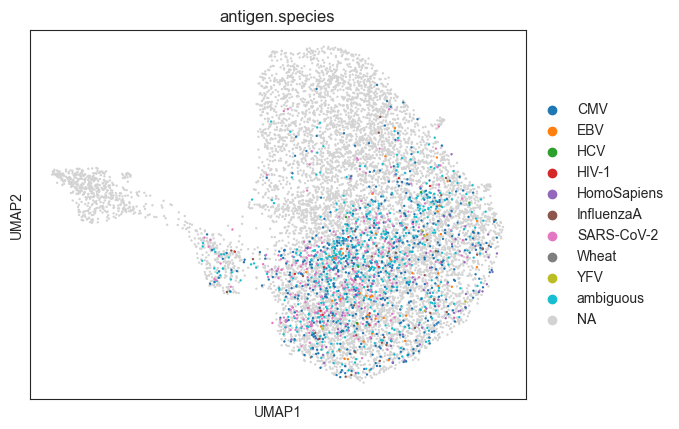

In [100]:
sc.pl.umap(adata, color="antigen.species")

Number of InfluenzaA cells in High NaCl condition: 16
Number of InfluenzaA cells in Low NaCl condition: 27
All InfluenzaA cells share the same clone ID: False


  0%|          | 0/37 [00:00<?, ?it/s]

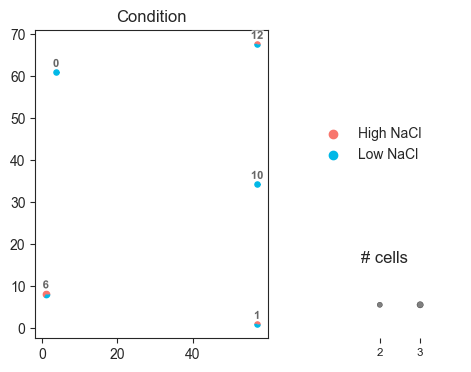

In [119]:
# Take all antigen.species and check if it is in high salt or in low salt and check if they all belong to same clone or not

# Filter cells
sars_cov_cells = adata[adata.obs['antigen.species'] == 'InfluenzaA']

# Check NaCl condition
high_nacl_cells = sars_cov_cells[sars_cov_cells.obs['Condition'] == 'High NaCl']
low_nacl_cells = sars_cov_cells[sars_cov_cells.obs['Condition'] == 'Low NaCl']

# Check clone ID
clone_ids = sars_cov_cells.obs['clone_id'].unique()
same_clone_id = len(clone_ids) == 1

# Print the results
print(f"Number of InfluenzaA cells in High NaCl condition: {len(high_nacl_cells)}")
print(f"Number of InfluenzaA cells in Low NaCl condition: {len(low_nacl_cells)}")
print(f"All InfluenzaA cells share the same clone ID: {same_clone_id}")


# Make the observation names unique
sars_cov_cells.obs_names_make_unique()

# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(sars_cov_cells)
ir.tl.define_clonotypes(sars_cov_cells, receptor_arms="all", dual_ir="primary_only")

ir.tl.clonotype_network(sars_cov_cells, min_cells=2) 

ir.pl.clonotype_network(
    sars_cov_cells, color="Condition", base_size=7, label_fontsize=8, panel_size=(3,4)
)

# Show the plot
plt.show()


Number of HIV-1 cells in High NaCl condition: 5
Number of HIV-1 cells in Low NaCl condition: 9
All HIV-1 cells share the same clone ID: False


  0%|          | 0/5 [00:00<?, ?it/s]

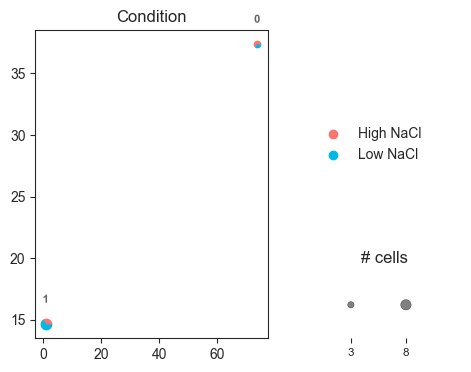

In [118]:
# Filter cells
sars_cov_cells = adata[adata.obs['antigen.species'] == 'HIV-1']

# Check NaCl condition
high_nacl_cells = sars_cov_cells[sars_cov_cells.obs['Condition'] == 'High NaCl']
low_nacl_cells = sars_cov_cells[sars_cov_cells.obs['Condition'] == 'Low NaCl']

# Check clone ID
clone_ids = sars_cov_cells.obs['clone_id'].unique()
same_clone_id = len(clone_ids) == 1

# Print the results
print(f"Number of HIV-1 cells in High NaCl condition: {len(high_nacl_cells)}")
print(f"Number of HIV-1 cells in Low NaCl condition: {len(low_nacl_cells)}")
print(f"All HIV-1 cells share the same clone ID: {same_clone_id}")

# Make the observation names unique
sars_cov_cells.obs_names_make_unique()

# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(sars_cov_cells)
ir.tl.define_clonotypes(sars_cov_cells, receptor_arms="all", dual_ir="primary_only")

ir.tl.clonotype_network(sars_cov_cells, min_cells=2) 

ir.pl.clonotype_network(
    sars_cov_cells, color="Condition", base_size=7, label_fontsize=8, panel_size=(3,4)
)

# Show the plot
plt.show()

Number of SARS-CoV-2 cells in High NaCl condition: 96
Number of SARS-CoV-2 cells in Low NaCl condition: 202
All SARS-CoV-2 cells share the same clone ID: False


  0%|          | 0/43 [00:00<?, ?it/s]

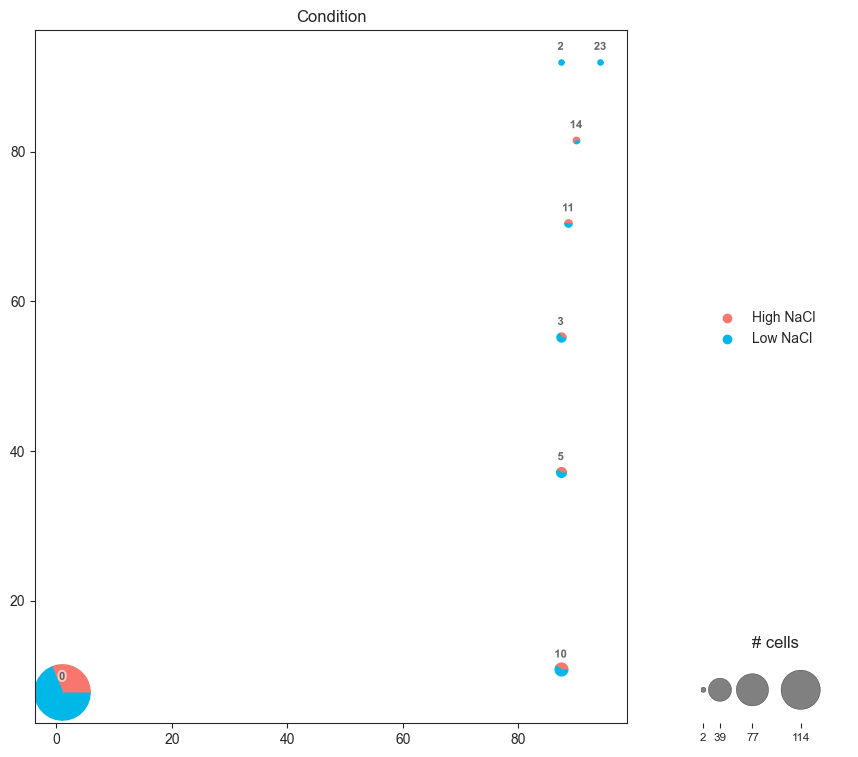

In [116]:
# Filter cells
sars_cov_cells = adata[adata.obs['antigen.species'] == 'SARS-CoV-2']

# Check NaCl condition
high_nacl_cells = sars_cov_cells[sars_cov_cells.obs['Condition'] == 'High NaCl']
low_nacl_cells = sars_cov_cells[sars_cov_cells.obs['Condition'] == 'Low NaCl']

# Check clone ID
clone_ids = sars_cov_cells.obs['clone_id'].unique()
same_clone_id = len(clone_ids) == 1

# Print the results
print(f"Number of SARS-CoV-2 cells in High NaCl condition: {len(high_nacl_cells)}")
print(f"Number of SARS-CoV-2 cells in Low NaCl condition: {len(low_nacl_cells)}")
print(f"All SARS-CoV-2 cells share the same clone ID: {same_clone_id}")

# Make the observation names unique
sars_cov_cells.obs_names_make_unique()

# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(sars_cov_cells)
ir.tl.define_clonotypes(sars_cov_cells, receptor_arms="all", dual_ir="primary_only")

ir.tl.clonotype_network(sars_cov_cells, min_cells=2) 

ir.pl.clonotype_network(
    sars_cov_cells, color="Condition", base_size=7, label_fontsize=8, panel_size=(8,9)
)

# Show the plot
plt.show()

